<a href="https://colab.research.google.com/github/ItzmeAkash/Bank-Loan-EDA/blob/main/Bank_Loan_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Loan Exploratory Data Analysis**

#**Project Summary**

#**Let's Begin!**

##**1.Import Libraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##**2.Dataset Loading**

In [2]:
#Mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Data set paths
colum_path=('/content/drive/MyDrive/Self Projects/Eda/Bank Loan/columns_description.csv')
app_path=('/content/drive/MyDrive/Self Projects/Eda/Bank Loan/application_data.csv')
pre_path=('/content/drive/MyDrive/Self Projects/Eda/Bank Loan/previous_application.csv')

In [4]:
#load Dataset
column_descrp_data=pd.read_csv(colum_path,encoding='cp1252')


In [5]:
application_df=pd.read_csv(app_path)


In [6]:
previous_app_df=pd.read_csv(pre_path)

##**Dataset First View**

###Understaning Datasets

In [7]:
#Application dataset First View
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Previous application dataset first view
previous_app_df.sample(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
21442,2419849,418054,Consumer loans,NaN,105705.0,105705.0,0.0,105705.0,SATURDAY,16,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
848343,1822686,298886,Revolving loans,22500.00,450000.0,450000.0,NaN,450000.0,MONDAY,16,...,XNA,0.0,XNA,Card X-Sell,-380.0,-350.0,365243.0,365243.0,365243.0,0.0
403836,2512055,111020,Consumer loans,26774.46,170910.0,149913.0,27346.5,170910.0,FRIDAY,13,...,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-2395.0,-2245.0,-2245.0,-2235.0,1.0
1297843,1316581,198286,Cash loans,22772.34,180000.0,191880.0,NaN,180000.0,FRIDAY,6,...,XNA,12.0,high,Cash Street: high,365243.0,-394.0,-64.0,-124.0,-121.0,1.0
221319,1412775,401826,Consumer loans,13494.60,94324.5,90850.5,9450.0,94324.5,SUNDAY,15,...,Consumer electronics,8.0,middle,POS household with interest,365243.0,-849.0,-639.0,-669.0,-662.0,0.0


In [9]:
#Checking Rows and Columns
print(f"Shape of the Application dataset is : {application_df.shape}")
print(f"Shape of the Previous application dataset is : {previous_app_df.shape}")

Shape of the Application dataset is : (307511, 122)
Shape of the Previous application dataset is : (1670214, 37)


In [10]:
#Size of the Dataset
print(f"Size of the Application dataset is {application_df.size}")
print(f"Size of the Previous application dataset is {previous_app_df.size}")

Size of the Application dataset is 37516342
Size of the Previous application dataset is 61797918


In [11]:
#Checking info of columns
application_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [12]:
# Previous Application info
previous_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
# Checking the numeric variables of the application dataset
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
# Checking the numeric variables of the application dataset
previous_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## **Data Cleaning & Manipulation**

###**Application Missing Values**

In [15]:
#Function to checking the null values
def find_null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [16]:
find_null_values(application_df)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

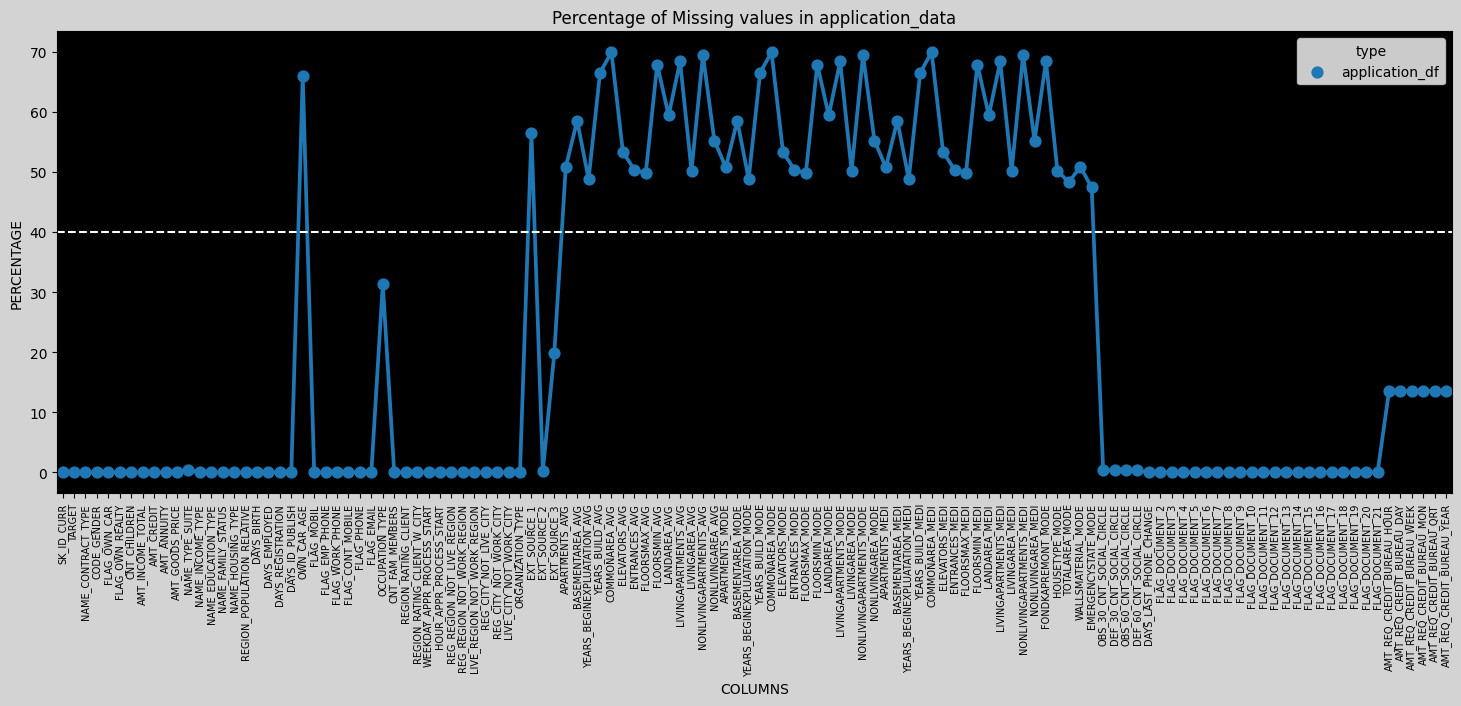

In [17]:
#Visualizing the null values
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((application_df.isnull().sum())*100/application_df.shape[0]).reset_index()
miss_data["type"] = "application_df"
ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='white')
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

**Observation**

   * from the plot we can see the columns in which percentage of null values more than 40% are marked above the white line and the columns which have less than 40 % null values below the white line. Let's check the columns which has more than 40% missing values

In [18]:
#creating a variable null_col_40 for storing null columns having missing values more than 40%
app_null_col_40 = find_null_values(application_df)[find_null_values(application_df)>40]
print("following columns have null value more than 40%")
print(app_null_col_40.index)
print("No. of columns with more than 40% missing value:",len(app_null_col_40.index))

following columns have null value more than 40%
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI'

**Observation**

Total of 49 columns are there which have more than  40% null values.Seem like most of the column with high missing values are related to different type of apartments owned and there belongs like car age ,bulid age and there properties related

###**Previous Application Missing Values**

In [19]:
find_null_values(previous_app_df)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

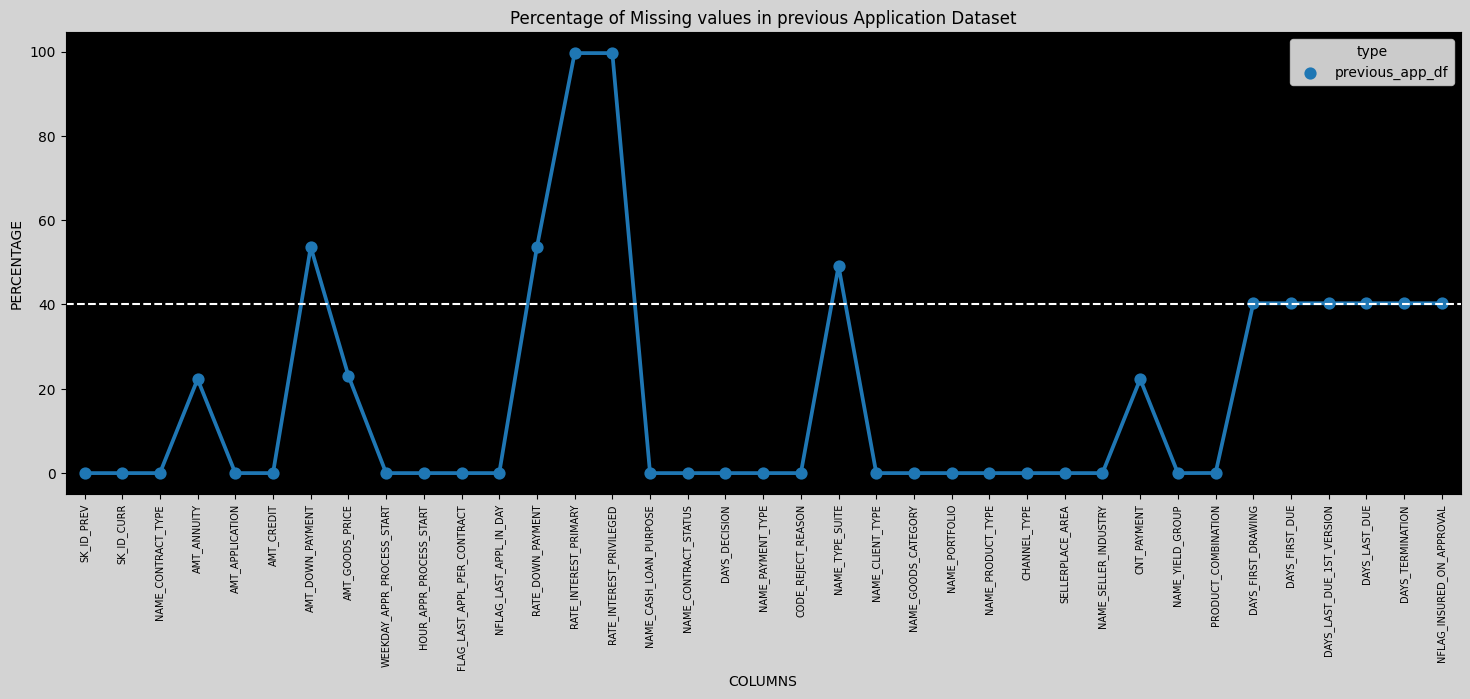

In [20]:
#Visualizing the null values
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((previous_app_df.isnull().sum())*100/previous_app_df.shape[0]).reset_index()
miss_data["type"] = "previous_app_df"
ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='white')
plt.title("Percentage of Missing values in previous Application Dataset")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

**Observation**

From the plot we can see the white line in above white line the percentage of null values more than 40%

In [21]:
#creating a variable null_col_40 for storing null columns having missing values more than 40%
null_col_40 = find_null_values(previous_app_df)[find_null_values(previous_app_df)>40]
print("following columns have null value more than 40%")
print(null_col_40.index)
print("No. of columns with more than 40% missing value:",len(null_col_40.index))

following columns have null value more than 40%
Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')
No. of columns with more than 40% missing value: 11


##**Analyze & Delete columns**


###Delete Unnecessary Columns of Application dataset

In [22]:
application_df.drop(columns = app_null_col_40.index, inplace = True)

In [23]:
application_df.shape

(307511, 73)

In [24]:
find_null_values(application_df)[find_null_values(application_df)>0]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [25]:
application_df['EXT_SOURCE_3'].sample()

203125   NaN
Name: EXT_SOURCE_3, dtype: float64

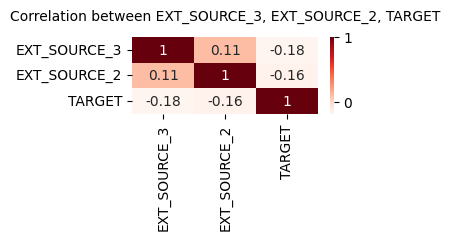

In [26]:
#removing extra columns
#putting irrelevent columns in 1 variable
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]
#making a heatmap to identify the coorelation
plt.figure(figsize= [3,1])
sns.heatmap(application_df[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":10}, pad=12)
plt.show()

**Observation**

In this above Heatmap,we can see there is no correlation between those columns

In [27]:
application_df.drop(irrev, axis=1, inplace= True)

In [28]:
application_df.shape

(307511, 71)

###

**Flag Document**

In [29]:
flag=[col for col in application_df.columns if "FLAG" in col]
flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [30]:
flag_df=application_df[flag+["TARGET"]]

In [31]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#according to column description ->1 implies defaulter, 0 implies repayer
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

In [33]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [34]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer


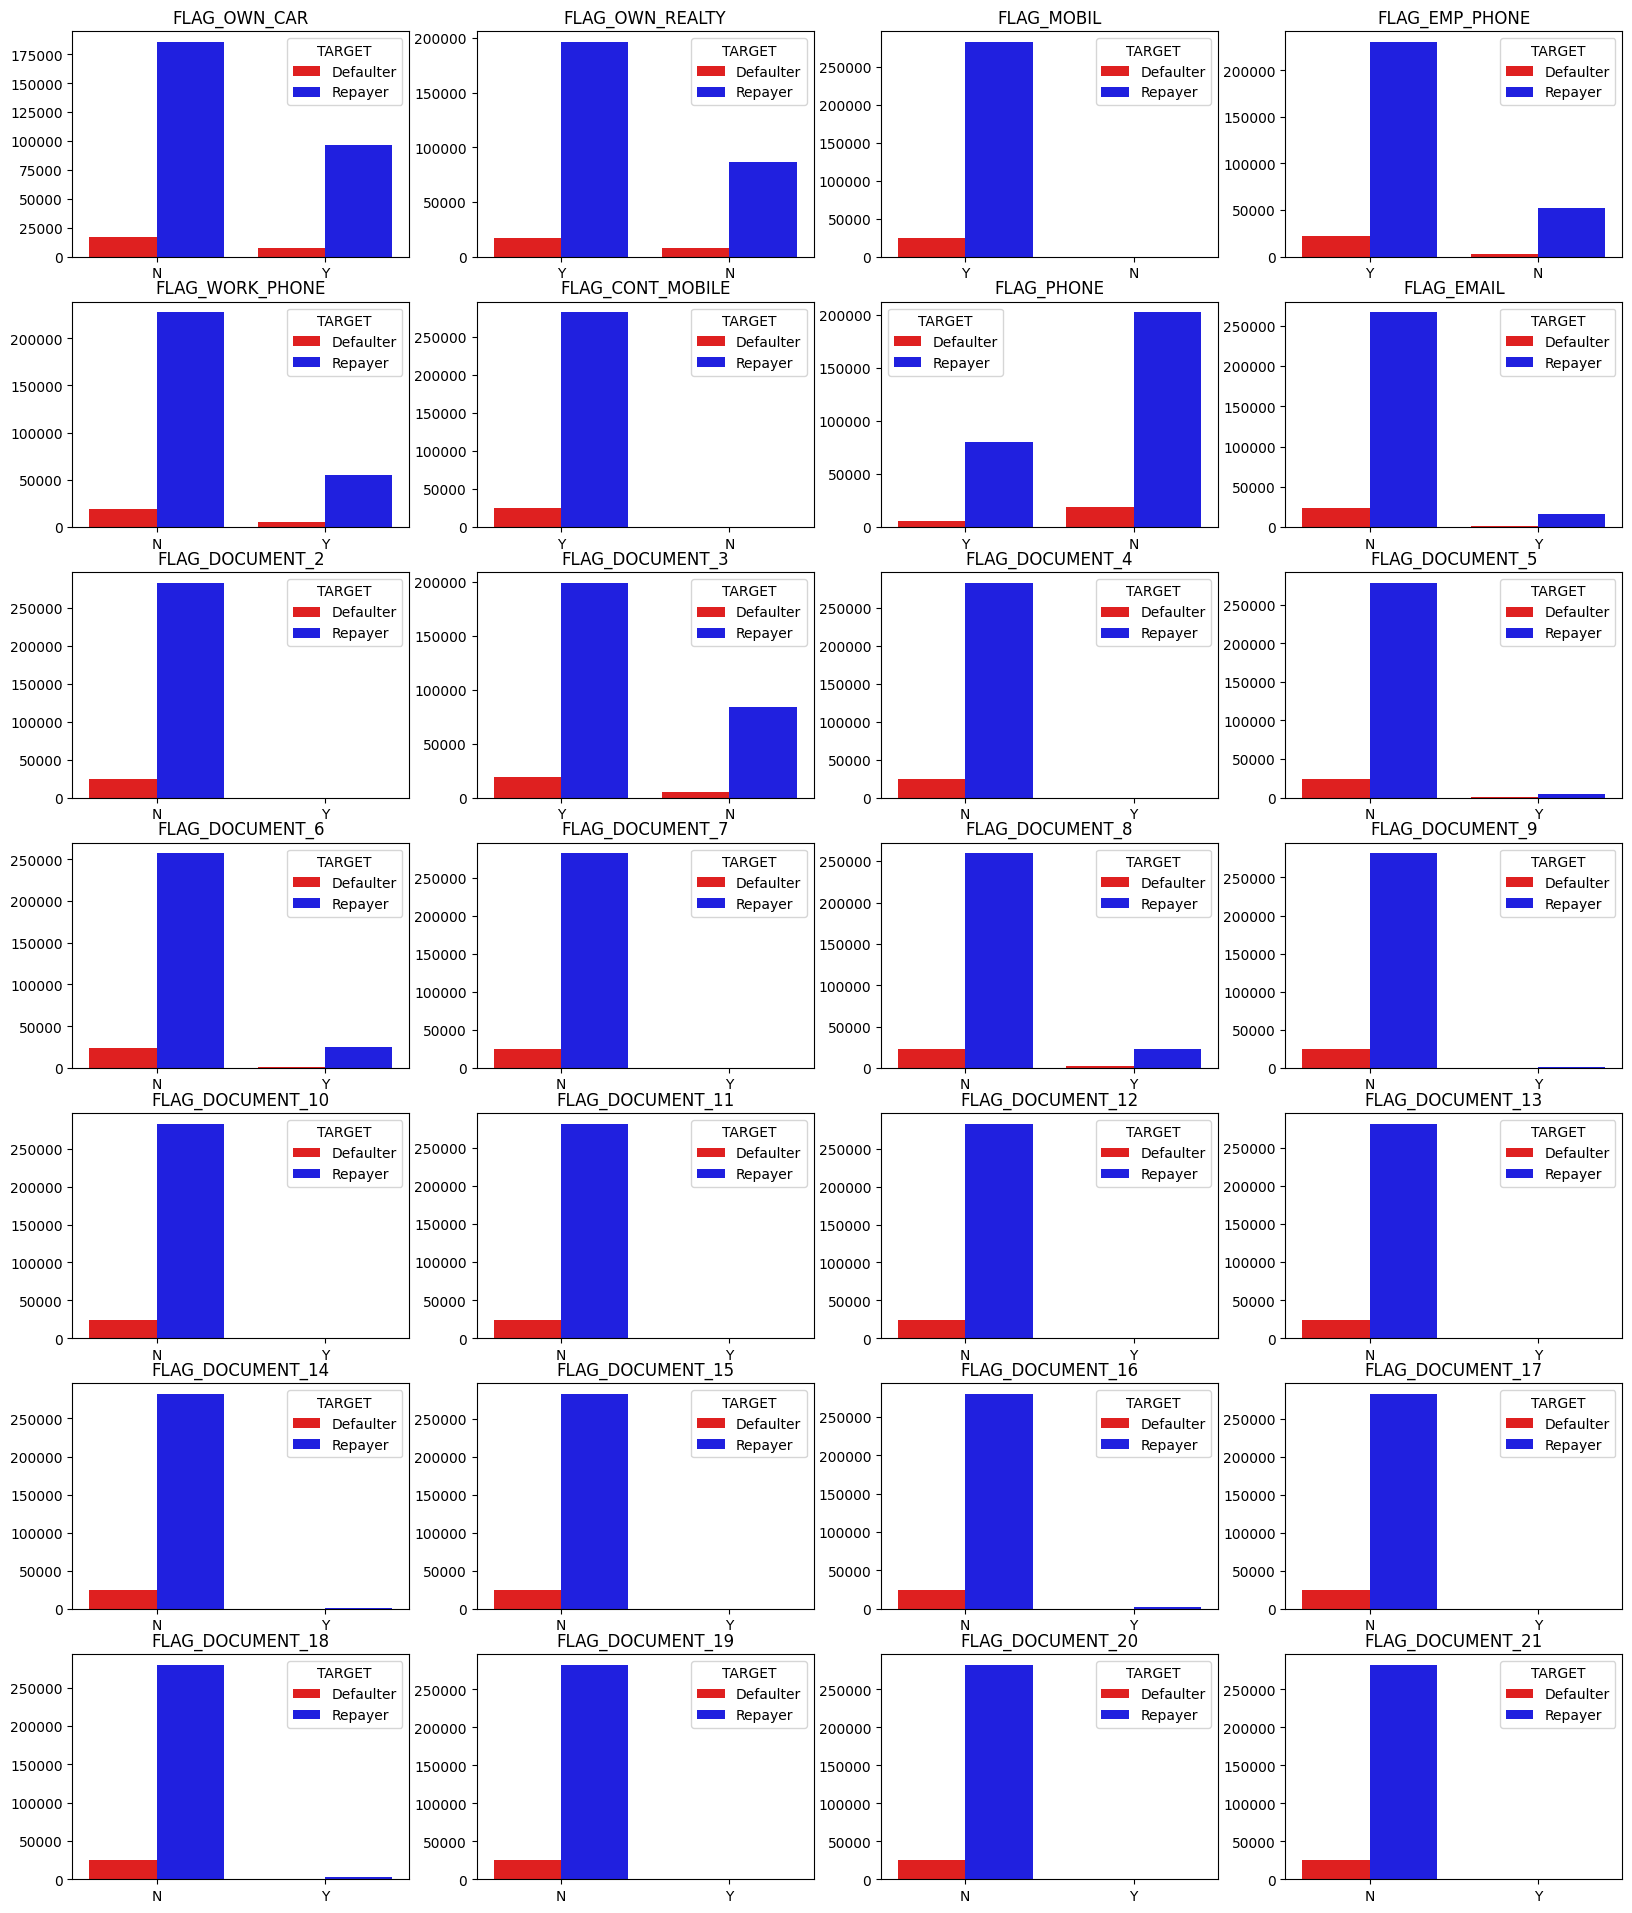

In [35]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Observation**

The graph indicates that the majority of loan applicants have not submitted any FLAG_DOCUMENT_X except for FLAG_DOCUMENT_3. Therefore, we can remove all columns except for FLAG_DOCUMENT_3. The data reveals that if a borrower has submitted FLAG_DOCUMENT_3, the likelihood of loan default is reduced

In [36]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "application_df" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

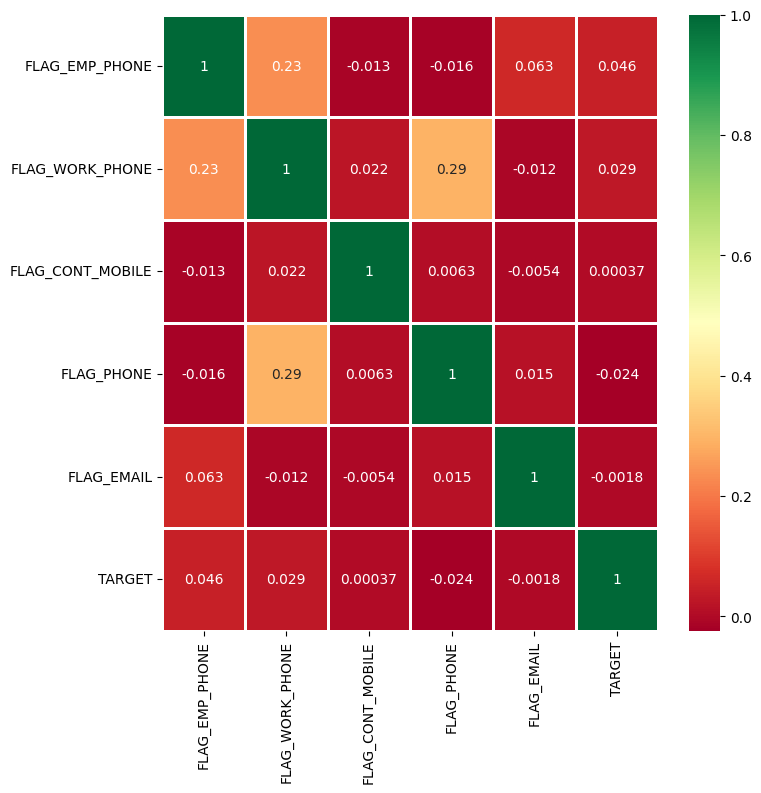

In [37]:
#Checking the coorelation between mobile phone,work phone etc,email family members and Region rating

contacts_columns=[ 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contacts_columns_corr=application_df[contacts_columns].corr()
flg=plt.figure(figsize=(8,8))
ax=sns.heatmap(contacts_columns_corr,annot=True,
               cmap='RdYlGn',
               linewidth=1)

**Observation**

We can see that,there is no correlation between those columns

In [38]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

application_df.drop(flag_df.columns, axis=1, inplace= True)

In [39]:
#Function of identify the columns
def find_Columns(df):
  for col in df.columns:
    print(col)
  return col

In [40]:
find_Columns(application_df)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_3
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


'AMT_REQ_CREDIT_BUREAU_YEAR'

In [41]:
#After removed the unwanted columns final application dataset
application_df.shape

(307511, 46)

###Delete Unnecessary Columns of Previous dataset

In [42]:
#11 Columns which have more than 40 % null values
Unnecessary_previous=null_col_40.index.tolist()
Unnecessary_previous

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [43]:
# Listing down columns which are not needed
Unwanted_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [44]:
unwanted_previous=Unwanted_previous+Unnecessary_previous
len(unwanted_previous)

15

**Observation**

- In the previous dataset there are total 15 columns can be deleted

In [45]:
#Droping the unwanted columns
previous_app_df.drop(labels=unwanted_previous,axis=1,inplace=True)




In [46]:
#Inspecting the dataframe after removal of unwanted columns
previous_app_df.shape

(1670214, 22)

In [47]:
previous_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

#**Standardize Values**




##**Standardize Values of application dataset**

In [48]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [49]:
#To see all the columns
pd.set_option('display.max_columns', None)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation**

In this application dataset there are some colums contains negative values.This columns  `DAYS_BIRTH`,`DAYS_EMPLOYED`,`DAYS_REGISTRATION`,`DAYS_ID_PUBLISH` are contain -ve values do we need to convert it into +ve values

**1.Converting negative values into postive values**

In [50]:
#Converting Negative days into Positive Days

data_neg_columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in data_neg_columns:
  application_df[col]=abs(application_df[col])

In [51]:
application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


**Observation**

Converted the negative values into postive values

**2.Convert `AMT_CREDIT` columns into category range of column**

In [52]:
# 2.Binning

#Creating bins for Credit amount

application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000

bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=slots)

In [53]:
#checking the binning of data and % of data in each category
application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

**Observation**

More than 16% loan applicants have taken loan which amount more than 1M and only 1.9% of loan applicant have taken only below 100k that was the least percentage of loan taken

**3.Creating a AGE columns**

In [54]:
#Creating bins for Age
application_df['AGE']=application_df['DAYS_BIRTH']//365
bins=[0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_df['AGE_GROUP']=pd.cut(application_df['AGE'],bins=bins,labels=slots)

In [55]:
#checking the binning of data and % of data in each category
application_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

**Observation**

In 31% of loan applicant have age above 50 years.The 51 % of loan applicant have age between 30 to 50

In [60]:
#Creating bins for Emplopyment time
application_df['YEARS_EMPLOYED']=application_df['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_df['EMPLOYMENT_YEAR']=pd.cut(application_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [61]:
#checking the binning of data and % of data in each category

application_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

**Observation**

More than 55% of the loan applicants have  0-5 years work exprience

In [62]:
#Checking the number of unique values each column possess to identify categorical columns
application_df.nunique().sort_values()

REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_3                     2
FLAG_MOBIL                          2
FLAG_OWN_REALTY                     2
NAME_CONTRACT_TYPE                  2
TARGET                              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AGE_GROUP                           5
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

###Data type Conversion

In [67]:
application_df['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [65]:
# Inspecting the column types if they are in correct data type using the above result

application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [75]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    application_df[col] =pd.Categorical(application_df[col])

In [76]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

##**Standardize Values of application dataset**

In [78]:
#Checking the number of unique values each column posses to identify categorical columns

previous_app_df.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [79]:
#Checking the column datatypes
previous_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [83]:
# converting negative days to positive days
previous_app_df['DAYS_DECISION']=abs(previous_app_df['DAYS_DECISION'])
previous_app_df['DAYS_DECISION']

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

In [85]:
#age group calculation e.g. 388 will be grouped as 300-400
previous_app_df['DAYS_DECISION_GROUP'] = (previous_app_df['DAYS_DECISION']-(previous_app_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previous_app_df['DAYS_DECISION'] - (previous_app_df['DAYS_DECISION'] % 400)) + (previous_app_df['DAYS_DECISION'] % 400) + (400 - (previous_app_df['DAYS_DECISION'] % 400))).astype(str)

In [86]:
previous_app_df['DAYS_DECISION_GROUP']

0              0-400
1              0-400
2              0-400
3            400-800
4            400-800
             ...    
1670209      400-800
1670210    1600-2000
1670211    1200-1600
1670212     800-1200
1670213     800-1200
Name: DAYS_DECISION_GROUP, Length: 1670214, dtype: object

In [88]:
previous_app_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

**Observation**

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision